# Whistle Detection

## Dataset Preparation

In [1]:
import warnings
warnings.filterwarnings("ignore")
from datamodules.whistle import WhistleDataset
from models.whistlenet.config import DATA_PARAMS

dataset = WhistleDataset(name = 'whistle/saved/smotenn', tobeloaded=True, params=DATA_PARAMS)
dataset.summarize()

DATA LOADED!

N Examples: 643762
N Classes: 2
Classes: [0. 1.]
 - Class 0: 321881 (50.0)
 - Class 1: 321881 (50.0)


## Training

MODEL LOADED!


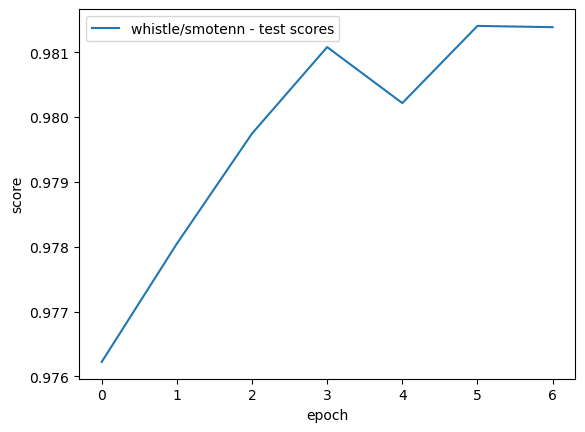

In [6]:
from models.whistlenet.whistlenet import WhistleNet
from models.whistlenet.config import TRAIN_PARAMS
from core.trainer import Trainer
import time
import matplotlib.pyplot as plt # type: ignore

complete_plot = False
train_model = False
names = []
names.append('whistle/smotenn') # TODO hardcodato
for name in names:
    model = WhistleNet(name,num_classes=5)
    trainer = Trainer(params=TRAIN_PARAMS)
    
    if not train_model:
        model.load(name)
    else:
        start_time = time.time()
        trainer.fit(model,dataset)
        model.training_time = time.time() - start_time
    
    plt.plot(model.test_scores, label=f'{name} - test scores')
    if complete_plot:
        plt.plot(model.train_scores, label=f'{name} - train scores')
        plt.plot(model.val_scores, label=f'{name} - val scores')
        
plt.legend()
plt.ylabel('score')
plt.xlabel('epoch')
plt.show()

## Inference

frame 0, time 0.00
tensor([[1.9007, 1.0371]]): NO
frame 1, time 0.02
tensor([[2.8391, 0.9447]]): NO
frame 2, time 0.05
tensor([[2.9133, 0.8616]]): NO
frame 3, time 0.07
tensor([[2.9115, 0.8593]]): NO
frame 4, time 0.09
tensor([[2.8837, 0.8953]]): NO
frame 5, time 0.12
tensor([[2.9114, 0.8620]]): NO
frame 6, time 0.14
tensor([[2.8669, 0.9215]]): NO
frame 7, time 0.16
tensor([[2.8712, 0.9070]]): NO
frame 8, time 0.19
tensor([[2.8619, 0.9181]]): NO
frame 9, time 0.21
tensor([[2.9096, 0.8637]]): NO
frame 10, time 0.23
tensor([[2.8707, 0.9052]]): NO
frame 11, time 0.26
tensor([[2.8616, 0.9187]]): NO
frame 12, time 0.28
tensor([[2.8647, 0.9111]]): NO
frame 13, time 0.30
tensor([[2.8846, 0.8876]]): NO
frame 14, time 0.33
tensor([[2.8565, 0.9211]]): NO
frame 15, time 0.35
tensor([[2.8504, 0.9316]]): NO
frame 16, time 0.37
tensor([[2.9045, 0.8616]]): NO
frame 17, time 0.39
tensor([[2.8502, 0.9305]]): NO
frame 18, time 0.42
tensor([[2.8840, 0.9106]]): NO
frame 19, time 0.44
tensor([[2.9378, 0.84

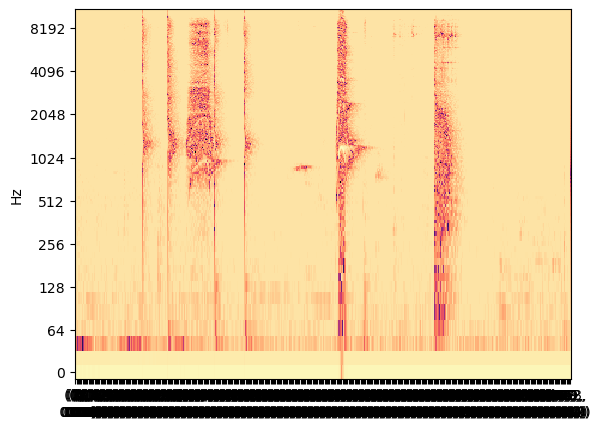

In [7]:
import torch
import sounddevice as sd
from datamodules.whistle import Audio
from core.utils import project_root

def classify(window):
    with torch.no_grad():
        prediction = model(window)
    predicted_class = torch.argmax(prediction).item()
    if predicted_class == 0:
        print(f"{prediction}: NO")
    else:
        print(f"{prediction}: YES")
    return predicted_class


projroot = project_root()
audio = Audio(name="test4", datapath=f'{projroot}/data/whistle/raw/test')
for i in range(audio.S.shape[1]):
    window = audio.S[:,i].reshape(1,1,513)
    print(f"frame {i}, time {audio.frame2time(i):.2f}")
    classify(window)
audio.freq_plot()